### Question 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt


class TrafficSimulator(object):

    # Mapping from the current state of a cell's neighborhood to the next state
    # of the cell. This corresponds to Wolfram's Rule 30.
    ca_map = {
        (0, 0, 0): 0,
        (0, 0, 1): 1,
        (0, 1, 0): 1,
        (0, 1, 1): 1,
        (1, 0, 0): 1,
        (1, 0, 1): 0,
        (1, 1, 0): 0,
        (1, 1, 1): 0}

    def __init__(self, length=15):
        '''
        Inputs:

         * length (int) The number of cells in the cellular automaton.
           Default: 50.

         * density (float) The proportion of cells that will be active (contain
           a car) when the cellular automaton is initialized. The active cells
           will be at random locations along the length of the CA. Default: 0.2.

         * interactive (bool) Whether or not we are running an interactive
           simulation. In CoCalc we have to run in non-interactive mode (False),
           but in your local Python environment you should be able to run in
           interactive mode (True). Default: False.

        '''
        self.length = length

        # Arrays for storing the current state and the next state (when we are
        # busy doing a state update).
        self.current_state = np.zeros(self.length)
        self.next_state = np.zeros(self.length)

    def initialize(self):
        '''
        Initialize the given CA
        '''
        self.current_state = np.array([0,0,1,0,1,0,1,0,1,0,1,0,1,0,0])
        self.time = 0

    def draw(self):
        '''
        Draw the current state of the cellular automaton.
        '''
        plt.figure()  # Create a new figure
        plt.pcolor(
            self.current_state.reshape((1, self.length)),
            vmin = 0,
            vmax = 1,
            cmap = plt.cm.binary)
        plt.axis('image')
        plt.title(str(self.time))
        plt.show()

    def step(self):
        '''
        Update the state of the cellular automaton.
        '''
        # Update all cells, except the boundaries.
        for i in range(1, self.length - 1):
            neighborhood = self.current_state[i-1:i+2]
            self.next_state[i] = self.ca_map[tuple(neighborhood)]
        # Update the boundaries using periodic boundary conditions.
        neighborhood = self.current_state[[-1, 0, 1]]
        self.next_state[0] = self.ca_map[tuple(neighborhood)]
        neighborhood = self.current_state[[-2, -1, 0]]
        self.next_state[-1] = self.ca_map[tuple(neighborhood)]
        # Swap next state and current state
        self.current_state, self.next_state = self.next_state, self.current_state
        self.time += 1


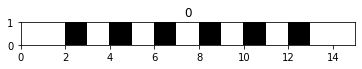

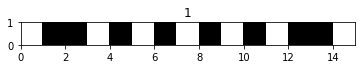

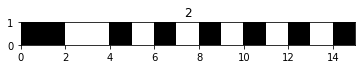

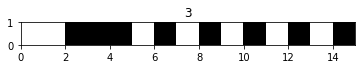

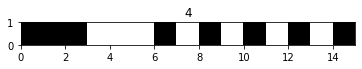

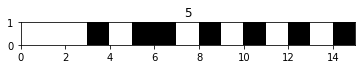

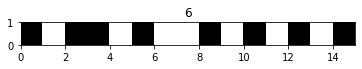

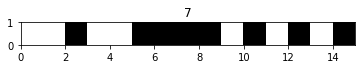

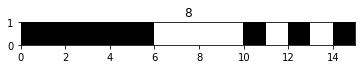

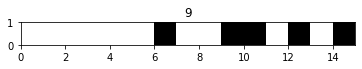

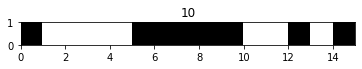

In [2]:
# Run the simulator for 100 steps and show some of the steps.

sim = TrafficSimulator(length = 15)

# Initial state:
sim.initialize()
sim.draw()

# Next 20 states:
for i in range(10):
    sim.step()
    sim.draw()



### Question 2

In [3]:
import itertools
lst = list(itertools.product([0, 1], repeat=10))

In [4]:
for i in range(len(lst)):
    lst[i] = np.array(lst[i]) #turn all elements of the list into numpy arrays

In [5]:
def next_step(ca): #define a function that gets the next step of a given config using rule 18
    ca_map = {
        (0, 0, 0): 0,
        (0, 0, 1): 1,
        (0, 1, 0): 0,
        (0, 1, 1): 0,
        (1, 0, 0): 1,
        (1, 0, 1): 0,
        (1, 1, 0): 0,
        (1, 1, 1): 0}  #rule 18
    '''
    Update the state of the cellular automaton.
    '''
    # Update all cells, except the boundaries.
    current_state=ca
    next_state=np.zeros(len(ca), dtype=np.int32)
    for i in range(1, len(ca)-1):
        neighborhood = current_state[i-1:i+2]
        next_state[i] = ca_map[tuple(neighborhood)]
    # Update the boundaries using periodic boundary conditions.
    neighborhood = current_state[[-1, 0, 1]]
    next_state[0] = ca_map[tuple(neighborhood)]
    neighborhood = current_state[[-2, -1, 0]]
    next_state[-1] = ca_map[tuple(neighborhood)]
    return next_state


In [6]:
#Strategy to find Garden of Eden: Get a list of all possible configs (above), then for each of those config,
#test if there is a predecessor among all remaining configs. If there is none, it is unreachable - a garden of eden
count = 0
lst_goe=[]
for i in lst:
    count_i=0
    for j in lst: 
        nxt = next_step(j) #the next step of all configs possible
        if np.array_equal(i,nxt) == True: #if there is one that leads to the current config:
            count_i += 1 #then the current config is NOT a garden of eden
    if count_i == 0: #if there is none that leads to the current config:
        count += 1 #it is a garden of eden
        lst_goe.append(i)

In [7]:
count
len(lst_goe) #there are 808 Gardens of Eden

808

In [8]:
#print out all gardens of eden
lst_goe

[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1]),
 array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 1, 0, 1, 1]),
 array([0, 0, 0, 0, 0, 0, 1, 1, 0, 1]),
 array([0, 0, 0, 0, 0, 0, 1, 1, 1, 0]),
 array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1]),
 array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 1, 0, 0, 1, 1]),
 array([0, 0, 0, 0, 0, 1, 0, 1, 0, 1]),
 array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0]),
 array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1]),
 array([0, 0, 0, 0, 0, 1, 1, 0, 0, 1]),
 array([0, 0, 0, 0, 0, 1, 1, 0, 1, 0]),
 array([0, 0, 0, 0, 0, 1, 1, 1, 0, 0]),
 array([0, 0, 0, 0, 0, 1, 1, 1, 0, 1]),
 array([0, 0, 0, 0, 0, 1, 1, 1, 1, 0]),
 array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1]),
 array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 1, 0, 0, 0, 1, 1]),
 array([0, 0, 0, 0, 1, 0, 0, 1, 0, 1]),
 array([0, 0, 0, 0, 1, 0, 0, 1, 1, 0]),
 array([0, 0, 0, 0, 1, 0, 0, 1, 1, 1]),


### Question 3

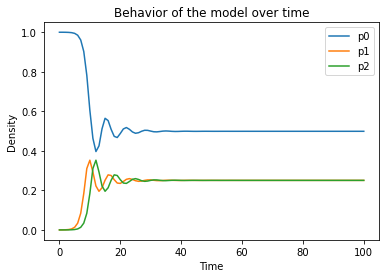

In [9]:
from scipy.special import comb
p0 = [0.9999] #model initialize with all quiescent cells with a proability to be excited of p1=0.001, 
#so density of quiescent cells is 0.9999
p1 = [0.0001] #starting rate to be excited
p2 = [0] #at step 0 there cannot be any refractory cells
pt = 1/3 #the probability of an excited cell exciting others

for t in range(100):
    p1.append(
        (1 - p1[t] - p2[t]) * sum(
            comb(8, k) * p1[t]**k * (1-p1[t])**(8-k) * (1-(1-pt)**k)
            for k in range(9)))
    if t != 0:
        p2.append(p1[t-1])
    else:
        p2.append(0)
    p0.append(1-p1[t] - p2[t])

plt.plot(range(101), p0, label = 'p0')
plt.plot(range(101), p1, label = 'p1')
plt.plot(range(101), p2, label = 'p2')
plt.legend()
plt.xlabel("Time")
plt.ylabel("Density")
plt.title("Behavior of the model over time")
plt.show()

### Question 4

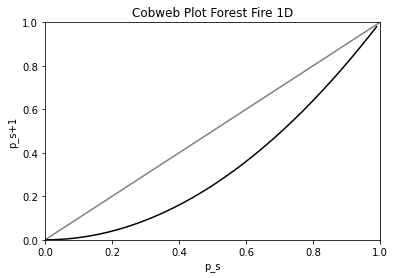

In [10]:
#Drawing Cobweb plot
def f(x):
    return x**2

xmin, xmax = 0,1
rng = np.arange(xmin, xmax, (xmax - xmin) / 100)
cobweb_y = [f(i) for i in rng]
plt.plot([xmin,xmax],[xmin,xmax], 'gray')
plt.plot(rng, cobweb_y, 'k')
plt.title("Cobweb Plot Forest Fire 1D")
plt.ylim(ymin=0, ymax=1)
plt.xlim(xmin=0, xmax=1)
plt.xlabel("p_s")
plt.ylabel("p_s+1")
plt.show()

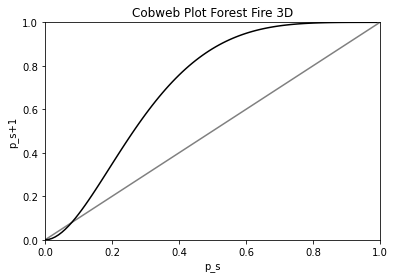

In [11]:
def g(x):
    return x**8 + 8*(x**7)*(1-x) + 28*(x**6)*((1-x)**2) +56*(x**5)*((1-x)**3) + 68*(x**4)*((1-x)**4) + 48*(x**3)*(
        (1-x)**5) + 16*(x**2)*((1-x)**6)

xmin, xmax = 0,1
rng = np.arange(xmin, xmax, (xmax - xmin) / 100)
cobweb_y = [g(i) for i in rng]
plt.plot([xmin,xmax],[xmin,xmax], 'gray')
plt.plot(rng, cobweb_y, 'k')
plt.title("Cobweb Plot Forest Fire 3D")
plt.ylim(ymin=0, ymax=1)
plt.xlim(xmin=0, xmax=1)
plt.xlabel("p_s")
plt.ylabel("p_s+1")
plt.show()